In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Görüntü alınarak renk uzayında okunmuş ve görüntü gri tonlamaya dönüştürülmüşütür.

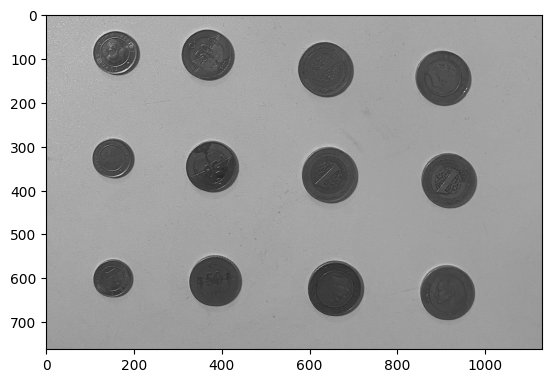

In [5]:
image = cv2.imread('bozuk_paralar.png')
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')   #cmap='gray' -> Griye dönüştürme işlemini doğru renk uzayında yapmak için kullanılmıştır.

Daha önce elde edilen gri görüntü üzerinden işlem yapmaktadır. Gauss bulanıklığı uygulanmıştır. Görsel bulanıklaştırılarak tespit işlemleri için kolaylık sağlanmıştır.

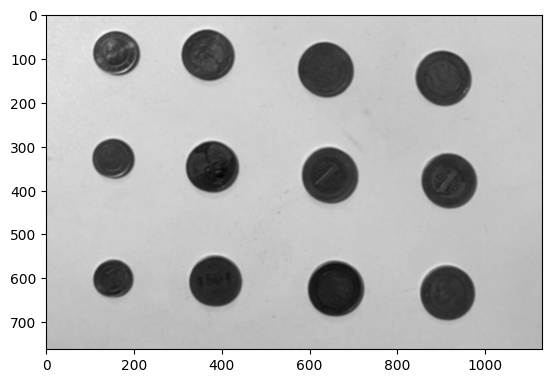

In [6]:
blur = cv2.GaussianBlur(gray,(11,11),0)  # (11,11) -> Gauss bulanıklığı çekirdeğinin boyutunu belirtir. Çekirdek boyutuna bağlı bulanıklık artmaktadır.
#blur = cv2.medianBlur(image,21)
plt.imshow(blur,cmap='gray')

Daha önce oluşturulmuş olan blur görüntüsü üzerinden işlem yapılmaktadır. Canny kenar algoritması kullanılarak bulanıklaştırılan görsel üzerinde kenar tespit işlemleri yapılmıştır.

Sobel Gradyan Çekirdeği = Kenar tespiti için kullanılan bir tür filtreleme maskesidir. Sobel operatörü, bir görüntünün türevini (gradyanını) kullanarak kenarları tespit etmek için yaygın olarak kullanılan bir tekniktir. Bu operatör, bir pikselin yoğunluk değerlerinin farklarını x ve y yönlerinde hesaplar, böylece görüntüdeki yoğunluk değişimlerini bulur ve bu değişimlerin büyük olduğu yerleri kenar olarak işaretler.

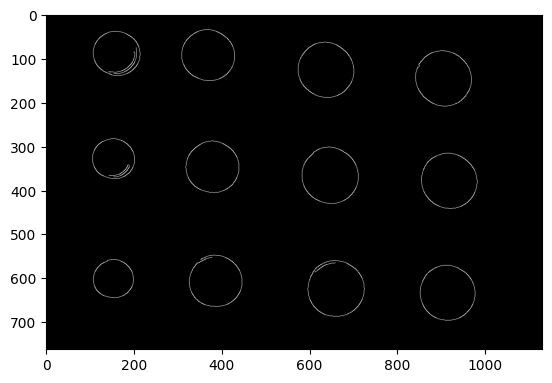

In [7]:
canny = cv2.Canny(blur,30,150,3) # 30,150 -> Kenar tespiti için eşik değerler        3 -> Sobel Gradyan Çekirdeği 
plt.imshow(canny,cmap='gray')

Daha önce kenarları tespit edilmiş olan canny görseli üzerinden işlem yapılmaktadır. Morfolojik bir işlem olan "dilation" işlemini gerçekleştirilmiştir.

Dilation işlemi genellikle kenar algılama veya görüntüdeki nesnelerin boyutunu artırmak için kullanılır. Bu işlem, görüntüdeki beyaz bölgeleri genişleterek pikseller arasındaki boşlukları kapatır veya kenarları kalınlaştırır.

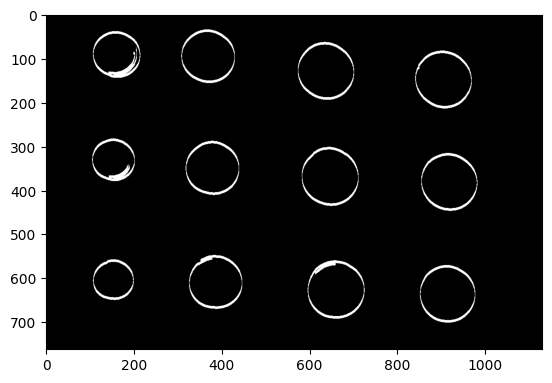

In [8]:
dilated = cv2.dilate(canny,(1,1),iterations=5) #(1,1) ->  Dilation işlemi için kullanılacak çekirdek boyutu 
plt.imshow(dilated,cmap='gray')

Kontur işlemleri gerçekleştirilerek kenar tespit işlemleri ve görüntü işlem sonuçlarını içermektedir.

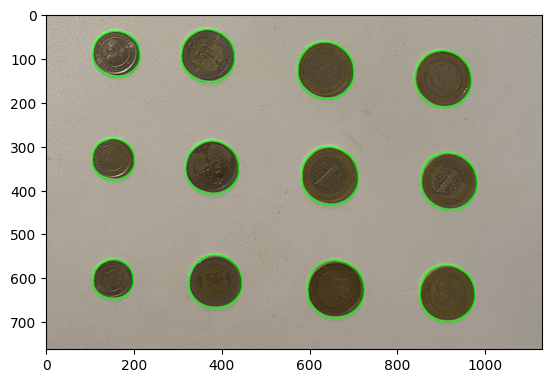

In [9]:
(cnt,heirarchy) = cv2.findContours(dilated.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)  # Dilation ile berillenmiş kenarların en dış konturları alınmış ve birleştirilmiştir. 
rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb,cnt,-1,(0,255,0),2)  #Tespit edilen konturları orjinal görüntü üzerinde görselleştirmektedir.

plt.imshow(rgb)

In [10]:
print('Coins in the image : ',len(cnt))

Coins in the image :  12


Tanınan nesnelerin kontur uzunluklarına dayalı olarak sınıflandırılma işlemi yapmakta ve sınıflama sonucu toplam tutarı hesapalanmaktadır.

In [11]:
# Eşik değerleri içeren bir sözlük
thresholds = {
    '1TL': 415,
    '50kr': 390,
    '25kr': 340,
    '10kr': 315,
}

# Para birimlerini depolamak için bir sözlük 
coins = {
    '1TL': [],
    '50kr': [],
    '25kr': [],
    '10kr': [],
    '5kr': [],
}

# Konturları döngü ile işleme ve uygun para birimine ekleme 
for contour in cnt:
    length = cv2.arcLength(contour, True)
    assigned = False
    for coin, threshold in thresholds.items():
        if length > threshold:
            coins[coin].append(contour)
            assigned = True
            break
    if not assigned:
        coins['5kr'].append(contour)

# Her bir para biriminin kontur uzunluklarını yazdırma işlemleri 
for coin, contours in coins.items():
    lengths = [cv2.arcLength(contour, True) for contour in contours]
    print(f'{coin} Kontur Uzunlukları: {lengths}')

print("--------------------------")

coin_values = {
    '1TL': 1,
    '50kr': 0.5,
    '25kr': 0.25,
    '10kr': 0.1,
    '5kr': 0.05,
}


toplam = 0

# Her bir listedeki para miktarını yazdırma
for coin, contours in coins.items():
    print(f'{coin}: {len(contours)}')
    print(coin)
    toplam += len(contours) * coin_values[coin]

print(toplam)


# Toplam para miktarı heaplam
#total_amount = sum(len(contours) * value for coin, contours in coins.items() for key, value in coin_values.items() if coin == key)
#print('Toplam Para: ', total_amount)


1TL Kontur Uzunlukları: [425.0609630346298, 435.3036036491394, 429.3036036491394, 434.96045780181885, 429.546244263649, 428.1320307254791]
50kr Kontur Uzunlukları: [406.0904005765915, 405.4041088819504, 402.57568180561066]
25kr Kontur Uzunlukları: [353.7056245803833]
10kr Kontur Uzunlukları: [321.3208485841751]
5kr Kontur Uzunlukları: [306.4924215078354]
--------------------------
1TL: 6
1TL
50kr: 3
50kr
25kr: 1
25kr
10kr: 1
10kr
5kr: 1
5kr
7.8999999999999995
